In [1]:
import os
import json
import re
import matplotlib.pyplot as plt

# Define the directory containing the JSON files
directory_path = '/home/zxia545/_Code/Research_repo/temp_Fodler/nips_graph/draw_entropy_graph/data_folder_gpt4_entropy_three_prompt'

# Function to count words and punctuation
def count_words_and_punctuation(output):
    words_and_punct = re.findall(r'\w+|[,.!]', output)
    return len(words_and_punct)




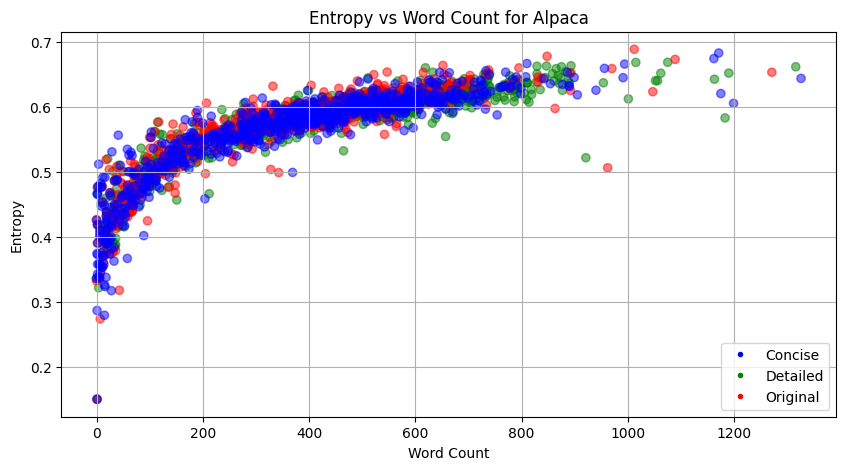

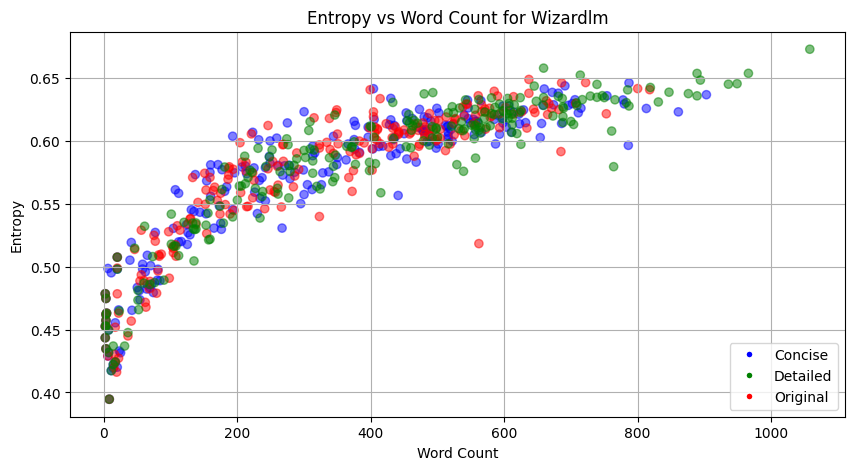

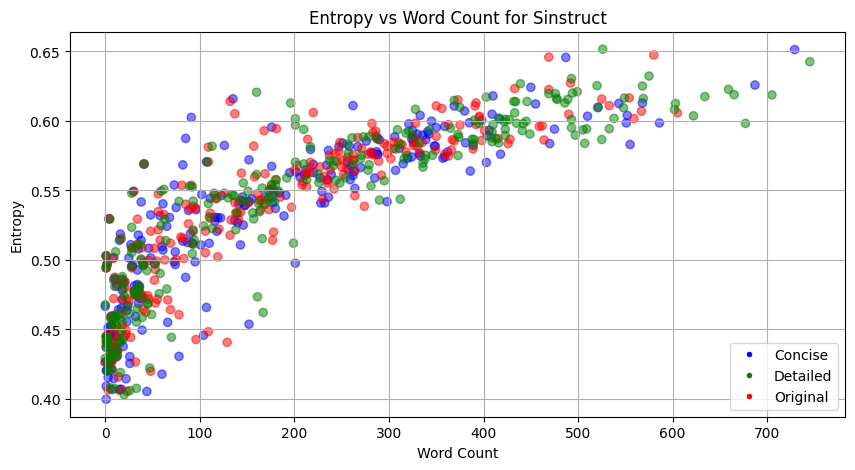

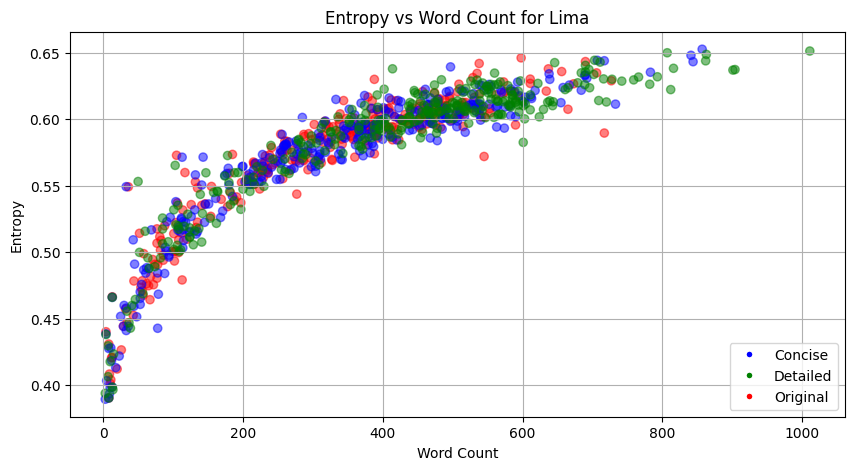

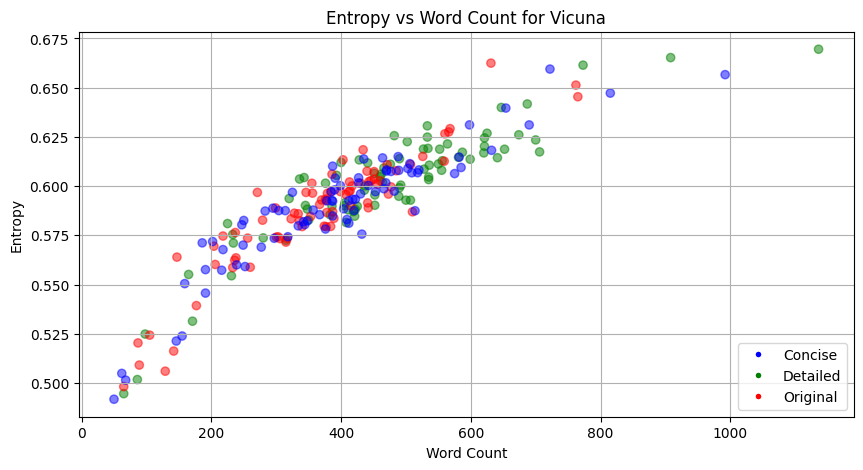

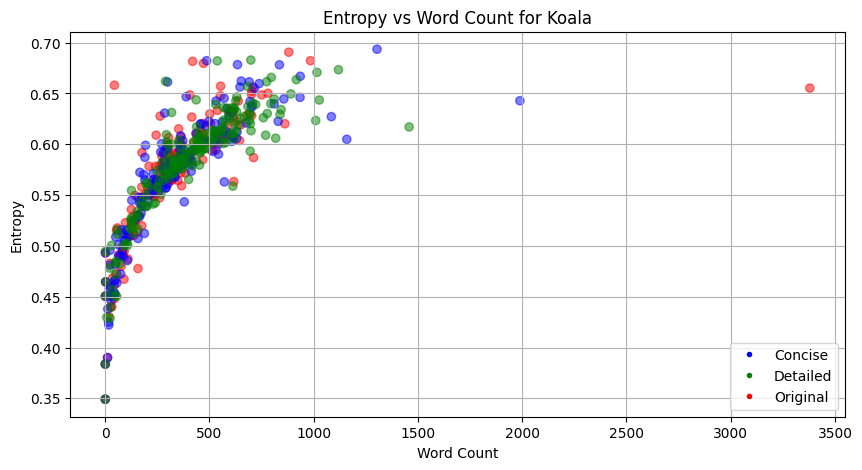

In [9]:
# Function to load and process data
def process_data(directory_path):
    data_by_dataset = {}
    
    # Iterate through each file in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith('.json'):
            parts = filename.split('_')
            if 'same_length' in filename:
                dataset = parts[2]
            else:
                dataset = parts[0]
            
            
            if 'concise' in filename:
                method = 'concise' 
            elif 'detailed' in filename:
                method = 'detailed'
            elif 'reference' in filename:
                method = 'original'
            
            # Load JSON data
            with open(os.path.join(directory_path, filename), 'r') as file:
                data = json.load(file)
            
            # Extract data and calculate word counts
            for item in data:
                entropy_score = item['entropy_score']
                word_count = count_words_and_punctuation(item['output'])
                
                # Organize data by dataset
                if dataset not in data_by_dataset:
                    data_by_dataset[dataset] = {'x': [], 'y': [], 'labels': []}
                data_by_dataset[dataset]['x'].append(word_count)
                data_by_dataset[dataset]['y'].append(entropy_score)
                data_by_dataset[dataset]['labels'].append(method)
    
    return data_by_dataset

# Plotting function
def plot_data(data_by_dataset):
    # Create a plot for each dataset
    for dataset, data in data_by_dataset.items():
        plt.figure(figsize=(10, 5))
        plt.scatter(data['x'], data['y'], c=[{'concise': 'blue', 'detailed': 'green', 'original': 'red'}[label] for label in data['labels']], alpha=0.5)
        dataset_name = dataset[0].upper() + dataset[1:]
        plt.title(f'Entropy vs Word Count for {dataset_name}')
        plt.xlabel('Word Count')
        plt.ylabel('Entropy')
        plt.grid(True)
        # Set legend to always appear at the bottom right
        plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=5, label='Concise'),
                            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=5, label='Detailed'),
                            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=5, label='Original')],
                   loc='lower right')
        plt.savefig(f'{dataset}_entropy_word_count.png')
        plt.show()

        

# Process the data and plot it
data_by_dataset = process_data(directory_path)
plot_data(data_by_dataset)

Word count greater than 2000: 3379
Entropy vs Word Count for Alpaca


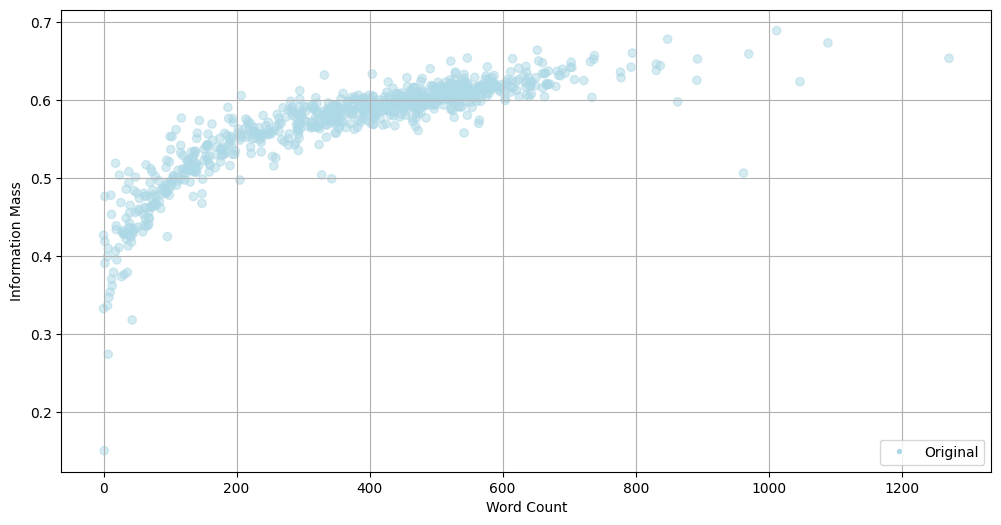

Entropy vs Word Count for Wizardlm


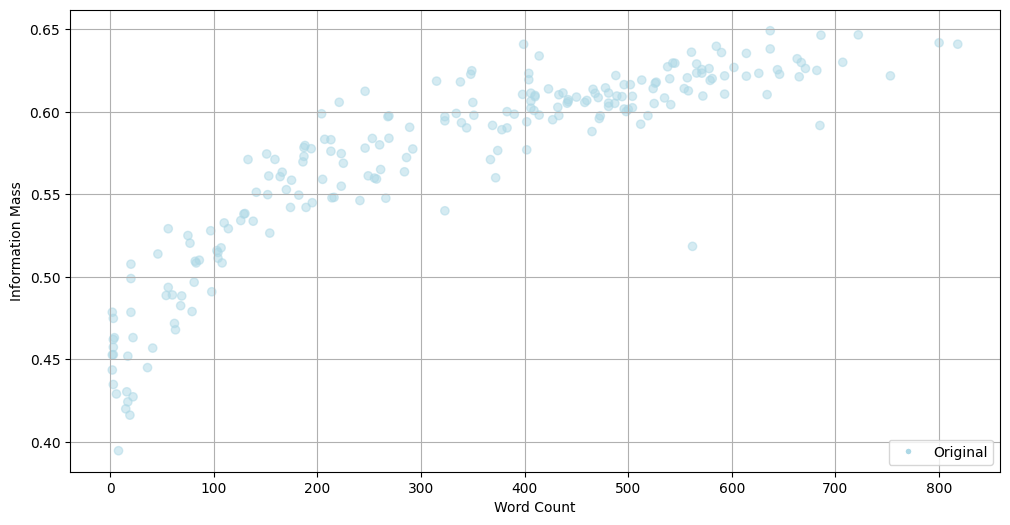

Entropy vs Word Count for Sinstruct


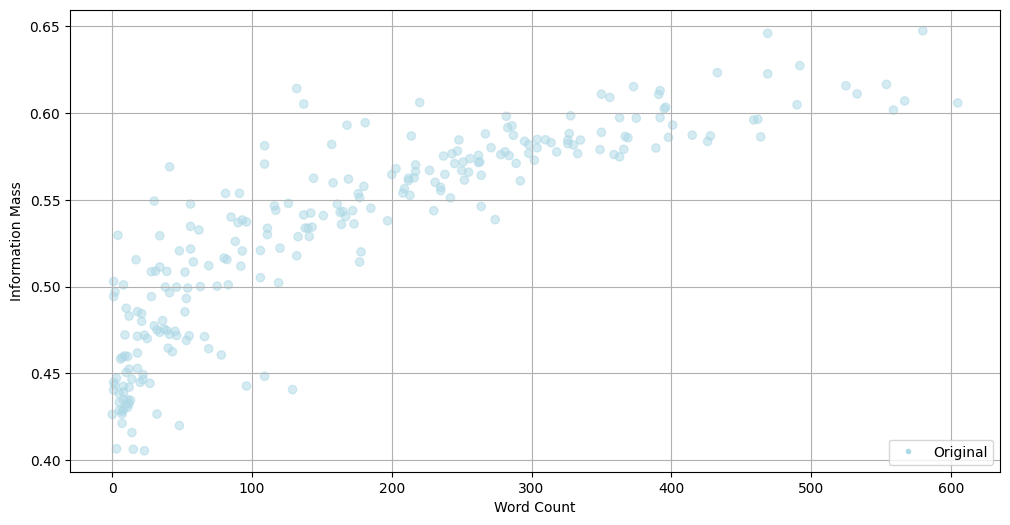

Entropy vs Word Count for Lima


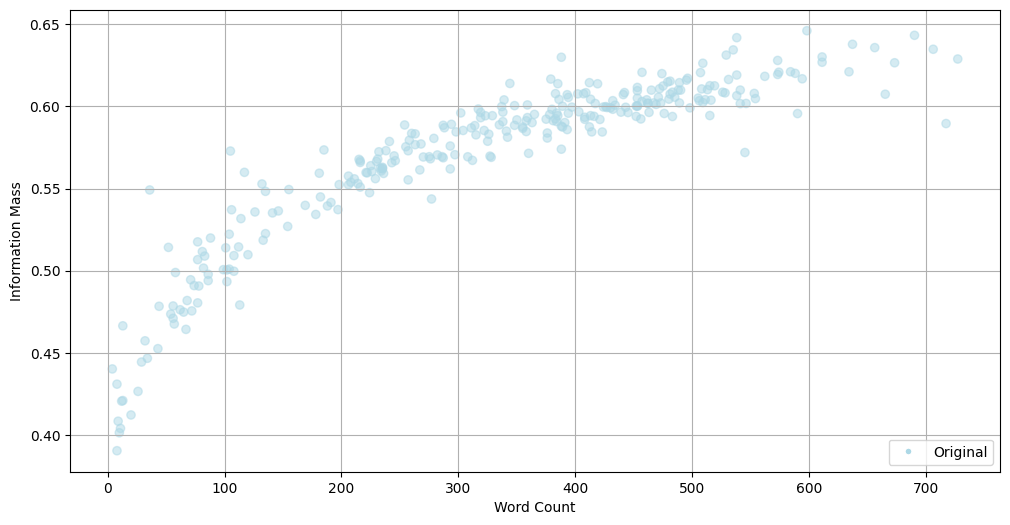

Entropy vs Word Count for Vicuna


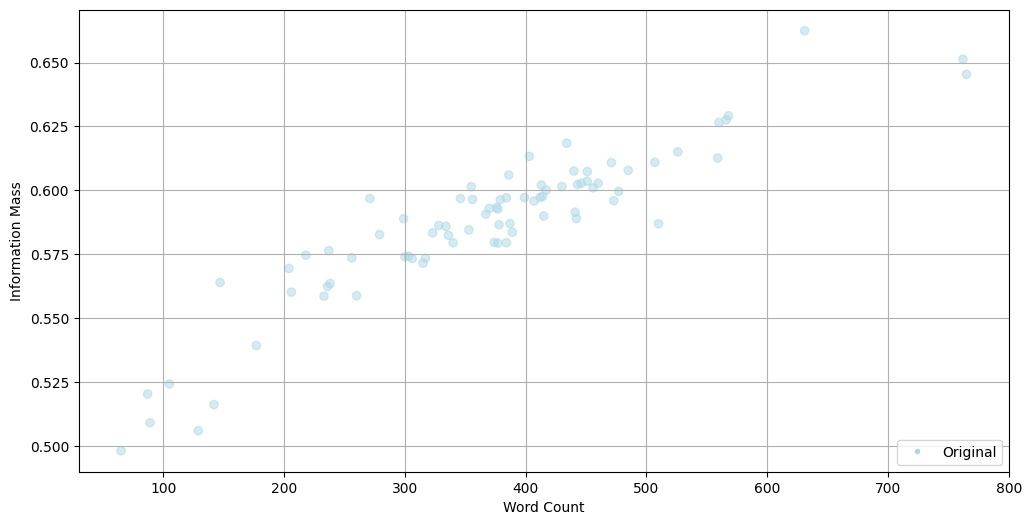

Entropy vs Word Count for Koala


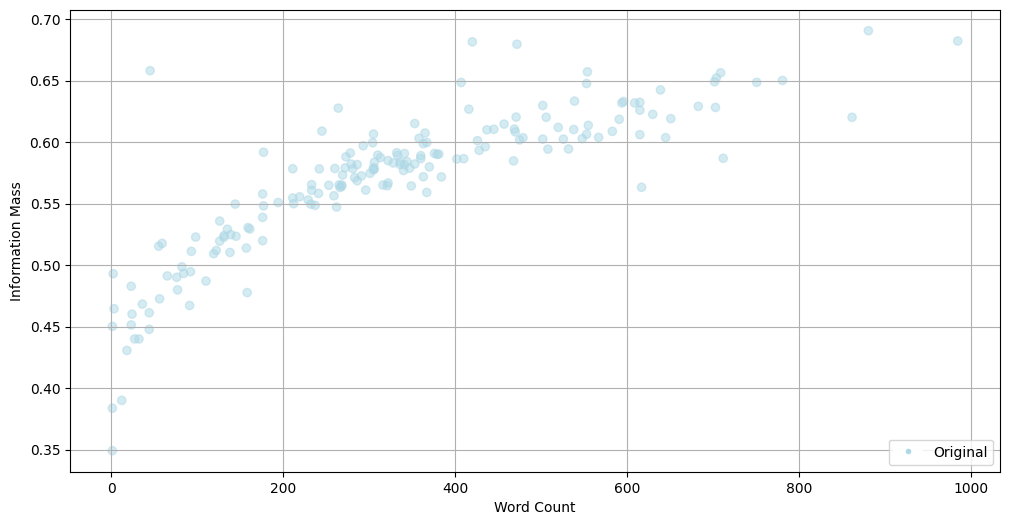

In [7]:
# Function to load and process data
def process_data(directory_path):
    data_by_dataset = {}
    
    # Iterate through each file in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith('.json'):
            parts = filename.split('_')
            if 'same_length' in filename:
                dataset = parts[2]
            else:
                dataset = parts[0]
            
            
            if 'concise' in filename:
                method = 'concise' 
            elif 'detailed' in filename:
                method = 'detailed'
            elif 'reference' in filename:
                method = 'original'
            
            # Load JSON data
            with open(os.path.join(directory_path, filename), 'r') as file:
                data = json.load(file)
            
            # Extract data and calculate word counts
            for item in data:
                entropy_score = item['entropy_score']
                word_count = count_words_and_punctuation(item['output'])
                
                if word_count > 2000:
                    print(f'Word count greater than 2000: {word_count}')
                    continue
                else:
                    # Organize data by dataset
                    if dataset not in data_by_dataset:
                        data_by_dataset[dataset] = {'x': [], 'y': [], 'labels': []}
                    
                    if method == 'original':
                        data_by_dataset[dataset]['x'].append(word_count)
                        data_by_dataset[dataset]['y'].append(entropy_score)
                        data_by_dataset[dataset]['labels'].append(method)
    
    return data_by_dataset



# Plotting function
def plot_data(data_by_dataset):
    # Create a plot for each dataset
    for dataset, data in data_by_dataset.items():
        plt.figure(figsize=(12, 6))
        plt.scatter(data['x'], data['y'], c=[{'original': 'lightblue'}[label] for label in data['labels']], alpha=0.5)
        dataset_name = dataset[0].upper() + dataset[1:]
        # plt.title(f'Entropy vs Word Count for {dataset_name}')
        print(f'Entropy vs Word Count for {dataset_name}')
        plt.xlabel('Word Count')
        plt.ylabel('Information Mass')
        plt.grid(True)
        # Set legend to always appear at the bottom right
        plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=5, label='Original')],
               loc='lower right')
        plt.savefig(f'{dataset}_entropy_word_count.png')
        plt.show()

        

# Process the data and plot it
data_by_dataset = process_data(directory_path)
plot_data(data_by_dataset)

In [9]:
import os
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
darker_blue = '#4682B4'  # Slightly darker shade of blue
# Function to count words and punctuation
def count_words_and_punctuation(text):
    # Replace this with your word and punctuation counting logic
    return len(text.split())

# Function to load and process data
def process_data(directory_path):
    data_by_dataset = {}
    
    # Iterate through each file in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith('.json'):
            parts = filename.split('_')
            if 'same_length' in filename:
                dataset = parts[2]
            else:
                dataset = parts[0]
            
            if 'concise' in filename:
                method = 'concise' 
            elif 'detailed' in filename:
                method = 'detailed'
            elif 'reference' in filename:
                method = 'original'
            
            # Load JSON data
            with open(os.path.join(directory_path, filename), 'r') as file:
                data = json.load(file)
            
            # Extract data and calculate word counts
            for item in data:
                entropy_score = item['entropy_score']
                word_count = count_words_and_punctuation(item['output'])
                
                if word_count > 2000:
                    print(f'Word count greater than 2000: {word_count}')
                    continue
                else:
                    # Organize data by dataset
                    if dataset not in data_by_dataset:
                        data_by_dataset[dataset] = {'x': [], 'y': [], 'labels': []}
                    
                    if method == 'original':
                        data_by_dataset[dataset]['x'].append(word_count)
                        data_by_dataset[dataset]['y'].append(entropy_score)
                        data_by_dataset[dataset]['labels'].append(method)
    
    return data_by_dataset

# Plotting function
def plot_data_to_pdf(data_by_dataset, output_pdf):

    # Create a plot for each dataset
    for dataset, data in data_by_dataset.items():
        real_output_pdf = dataset[0].lower()+ dataset[1:] + output_pdf
        with PdfPages(real_output_pdf) as pdf:
            plt.figure(figsize=(4, 2.5))
            plt.scatter(
                data['x'], 
                data['y'], 
                c=[{'original': darker_blue}[label] for label in data['labels']], 
                alpha=0.5
            )
            dataset_name = dataset[0].upper() + dataset[1:]
            print(f'Entropy vs Word Count for {dataset_name}')
            
            plt.xlabel('Word Count', fontsize=12)
            plt.ylabel('Information Mass', fontsize=12)
            plt.grid(True)
            plt.tight_layout()
            # Set legend to always appear at the bottom right
            # plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=5, label='Original')], loc='lower right')
            # Save the current figure to the PDF
            pdf.savefig()  # Saves the current figure into the PDF
            plt.close()

# Directory path and output file
directory_path = '/home/zxia545/_Code/Research_repo/temp_Fodler/nips_graph/draw_entropy_graph/data_folder_gpt4_entropy_three_prompt'  # Replace with your directory path
output_pdf = '_entropy_word_count.pdf'

# Process the data and generate PDF
data_by_dataset = process_data(directory_path)
plot_data_to_pdf(data_by_dataset, output_pdf)


Word count greater than 2000: 3013
Entropy vs Word Count for Alpaca
Entropy vs Word Count for Wizardlm
Entropy vs Word Count for Sinstruct
Entropy vs Word Count for Lima
Entropy vs Word Count for Vicuna
Entropy vs Word Count for Koala


In [3]:
import json
import re
def count_words_and_punctuation(output):
    words_and_punct = re.findall(r'\w+|[,.!]', output)
    return len(words_and_punct)

j1 = json.load(open(f'./data_folder_gpt4_entropy_three_prompt/alpaca_gpt4_reference.json'))


len1 = 0

for item in j1:
    output = item['output']
    len1 += count_words_and_punctuation(output)

print(len1/len(j1))




363.85093167701865
